In [3]:
import numpy as np
import qutip as qp
import matplotlib.pyplot as plt
%matplotlib notebook

# Hamiltonian initialization

In [93]:
dw = 2e-9 * np.pi * 0e6
OmR = 2e-9 * np.pi * 60e6
G1 = 1/115
G2 = 1/167

H0 = -dw * qp.sigmaz()
H1 = - qp.sigmax() / 2

c_ops = [np.sqrt(G1/2) * qp.sigmap(), np.sqrt(G2)/2 * qp.sigmaz()]

In [94]:
def Omega(t, tau):
    if tau == 0:
        return 0
    return OmR * (1 - np.cos(2 * np.pi * t / tau)) / 2 * (t < tau)

In [95]:
H = [H0, [H1, Omega]]
rho0 = qp.fock_dm(2, 0)

# Pi pulse characterization

In [96]:
durations = np.linspace(0, 400, 401)
z = np.empty_like(durations)

for i, duration in enumerate(durations):
    output = qp.mesolve(H, rho0, durations, c_ops, e_ops=[qp.sigmaz()], args=duration, options=qp.Options(nsteps=1000))
    z[i] = output.expect[0][i]

<IPython.core.display.Javascript object>


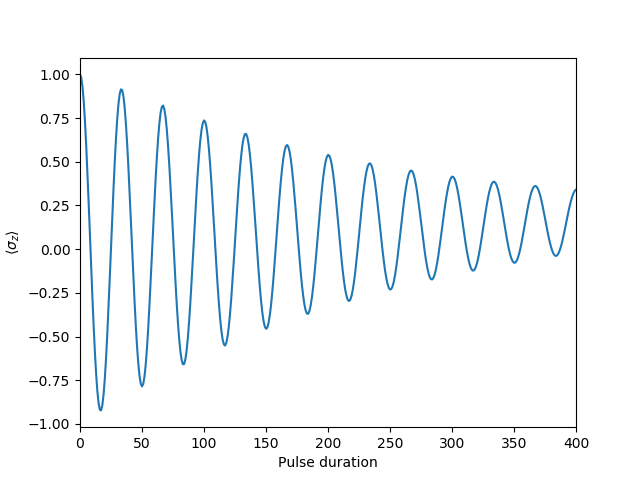

In [97]:
plt.figure()
plt.plot(durations, z)
plt.xlabel("Pulse duration")
plt.ylabel("$\langle \sigma_z\\rangle$")
plt.margins(x=0)
plt.show()